# Food Idntification

In [ ]:
#Defining file paths of data sets.

train_dir = "/content/drive/MyDrive/Y4S1/Reserch/FoodDataSet/training"
val_dir   = "/content/drive/MyDrive/Y4S1/Reserch/FoodDataSet/validation"
test_dir  = "/content/drive/MyDrive/Y4S1/Reserch/FoodDataSet/evaluation"

In [ ]:
#Checking the instant having gpu acceleration
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
# Importing tensorflow client and checking the detection of GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10433470753038197430
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2120973738895731386
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

## Data Preprocessing

In [ ]:
# Importing preprocessing libriries.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting target sizes
target_size = (224,224)
batch_size = 16

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 9866 images belonging to 11 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 3430 images belonging to 11 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 3347 images belonging to 11 classes.


## Labels

In [ ]:
#Printing available labels
labels = list(test_generator.class_indices.keys())
print(labels)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


## Model

In [ ]:
# Importing Keras
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
# Installing efficientnet libraries
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 4.5 MB/s 


In [ ]:
import efficientnet.tfkeras as efn
base_model = efn.EfficientNetB7(input_shape=(224,224,3), weights='imagenet', include_top=False)

258449408/258434480 [==============================] - 21s 0us/step


In [ ]:
# Add Extra Layers to Model
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) 
x=Dense(64,activation='relu')(x) 
out=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=out)

In [ ]:
# For Transfer Learning
base_model.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 64  1728        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 64  256         ['stem_conv[0][0]']              
                                )                                                             

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## **Train Model**

In [ ]:
# Setting number of epochs
num_epochs = 30
# Setting strings for train valid and test
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

In [ ]:
# Fitting the model
model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, 
          validation_data=valid_generator, validation_steps=STEP_SIZE_VALID)

Epoch 1/30
616/616 [==============================] - 4152s 7s/step - loss: 1.0523 - accuracy: 0.6609 - val_loss: 0.6326 - val_accuracy: 0.7961
Epoch 2/30
616/616 [==============================] - 178s 289ms/step - loss: 0.7694 - accuracy: 0.7474 - val_loss: 0.5568 - val_accuracy: 0.8207
Epoch 3/30
616/616 [==============================] - 178s 288ms/step - loss: 0.6853 - accuracy: 0.7695 - val_loss: 0.5583 - val_accuracy: 0.8186
Epoch 4/30
616/616 [==============================] - 177s 288ms/step - loss: 0.6401 - accuracy: 0.7902 - val_loss: 0.5050 - val_accuracy: 0.8329
Epoch 5/30
616/616 [==============================] - 177s 288ms/step - loss: 0.6065 - accuracy: 0.7993 - val_loss: 0.4842 - val_accuracy: 0.8446
Epoch 6/30
616/616 [==============================] - 178s 288ms/step - loss: 0.5639 - accuracy: 0.8126 - val_loss: 0.4720 - val_accuracy: 0.8417
Epoch 7/30
616/616 [==============================] - 177s 288ms/step - loss: 0.5288 - accuracy: 0.8230 - val_loss: 0.4793 - v

In [ ]:
# Evaluate Model using evaluate set
loss, acc = model.evaluate(test_generator, steps=STEP_SIZE_TEST)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

209/209 [==============================] - 1067s 5s/step - loss: 0.3978 - accuracy: 0.8876
The accuracy of the model is 0.888
The Loss in the model is 0.398


In [ ]:
# Getting the confusion matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

preds=model.predict(test_generator)
y_pred = np.argmax(preds,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[303   3  13  23  12   9   0   0   3   1   1]
 [  6 110  10   7   6   2   0   1   1   3   2]
 [  9  10 407  15   4  18   0   5  10  13   9]
 [  8   0  12 300   0   5   0   2   6   1   1]
 [ 16   0  10   3 241  10   0   2   1   2   2]
 [  4   1   3   7   8 400   0   0   4   2   3]
 [  0   0   0   1   0   0 145   0   0   1   0]
 [  0   0   1   0   0   1   0  94   0   0   0]
 [  1   3  12   2   1   9   0   1 270   2   2]
 [  3   2   4   2   0   0   1   1   2 485   0]
 [  2   0   1   0   0   2   1   0   6   3 216]]


## Model Dumping

In [ ]:
#Dumping into Gdrive using pickle
import pickle
pickle.dump(model,open('/content/drive/MyDrive/Y4S1/Reserch/food11.pickle','wb'))

INFO:tensorflow:Assets written to: ram://7aac853b-cb83-4abb-96cb-fa3269ed269c/assets


## Testing

In [3]:
# Importing pickled model
import pickle
model=pickle.load(open('/content/drive/MyDrive/Y4S1/Reserch/food11.pickle','rb'))

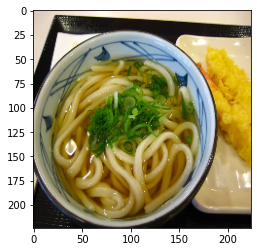

In [4]:
# importing openCV
import cv2
from matplotlib.pyplot import imshow
# Reaing image from location
test_image = cv2.imread('/content/drive/MyDrive/Y4S1/Reserch/FoodDataSet/evaluation/Noodles-Pasta/1.jpg') 
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
#Showing image
im = imshow(test_image)


In [5]:
# Changing array axis with expanding.
import numpy as np
predict_image = np.expand_dims(test_image, axis = 0)

In [6]:
print("\nShape of the image is: " + str(test_image.shape))


Shape of the image is: (224, 224, 3)


In [7]:
# Getting the probability list by sending the image into the created model
probability_list = model.predict(predict_image)
print(probability_list)


[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  4.209868e-30]]


In [8]:
# Checking the maximum probability
max_value = max(probability_list[0])
duplicate_list = list(probability_list[0])
index = duplicate_list.index(max_value)


In [9]:
print('\nPredicted class is: '+ str(index))


Predicted class is: 5
